## Objective:

Here we will be dealing with a classification problem. We have to build a model that can predict whether the client will subscribe to a term deposit or not. The target variable is a string column represented by ('Yes'/'No').

## Steps and tasks:
1. We will be reading the data and performing basic EDA before fitting the model.
2. Multiple classifiers would be used on the same data and the relative performance woud be compared.
3. We will be focussing on ensemble classifiers in this exercise viz.,
  - Radom Forests
  - XGBoost
  

In [ ]:
# pip install seaborn --upgrade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\piyus\Desktop\techis-ds-wiki-main\DS\Step 2-3 DT and Ensemble\02_Ensemble Methods\bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [13]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [5]:
df[['job','education']] = df[['job','education']].replace('unknown','other')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

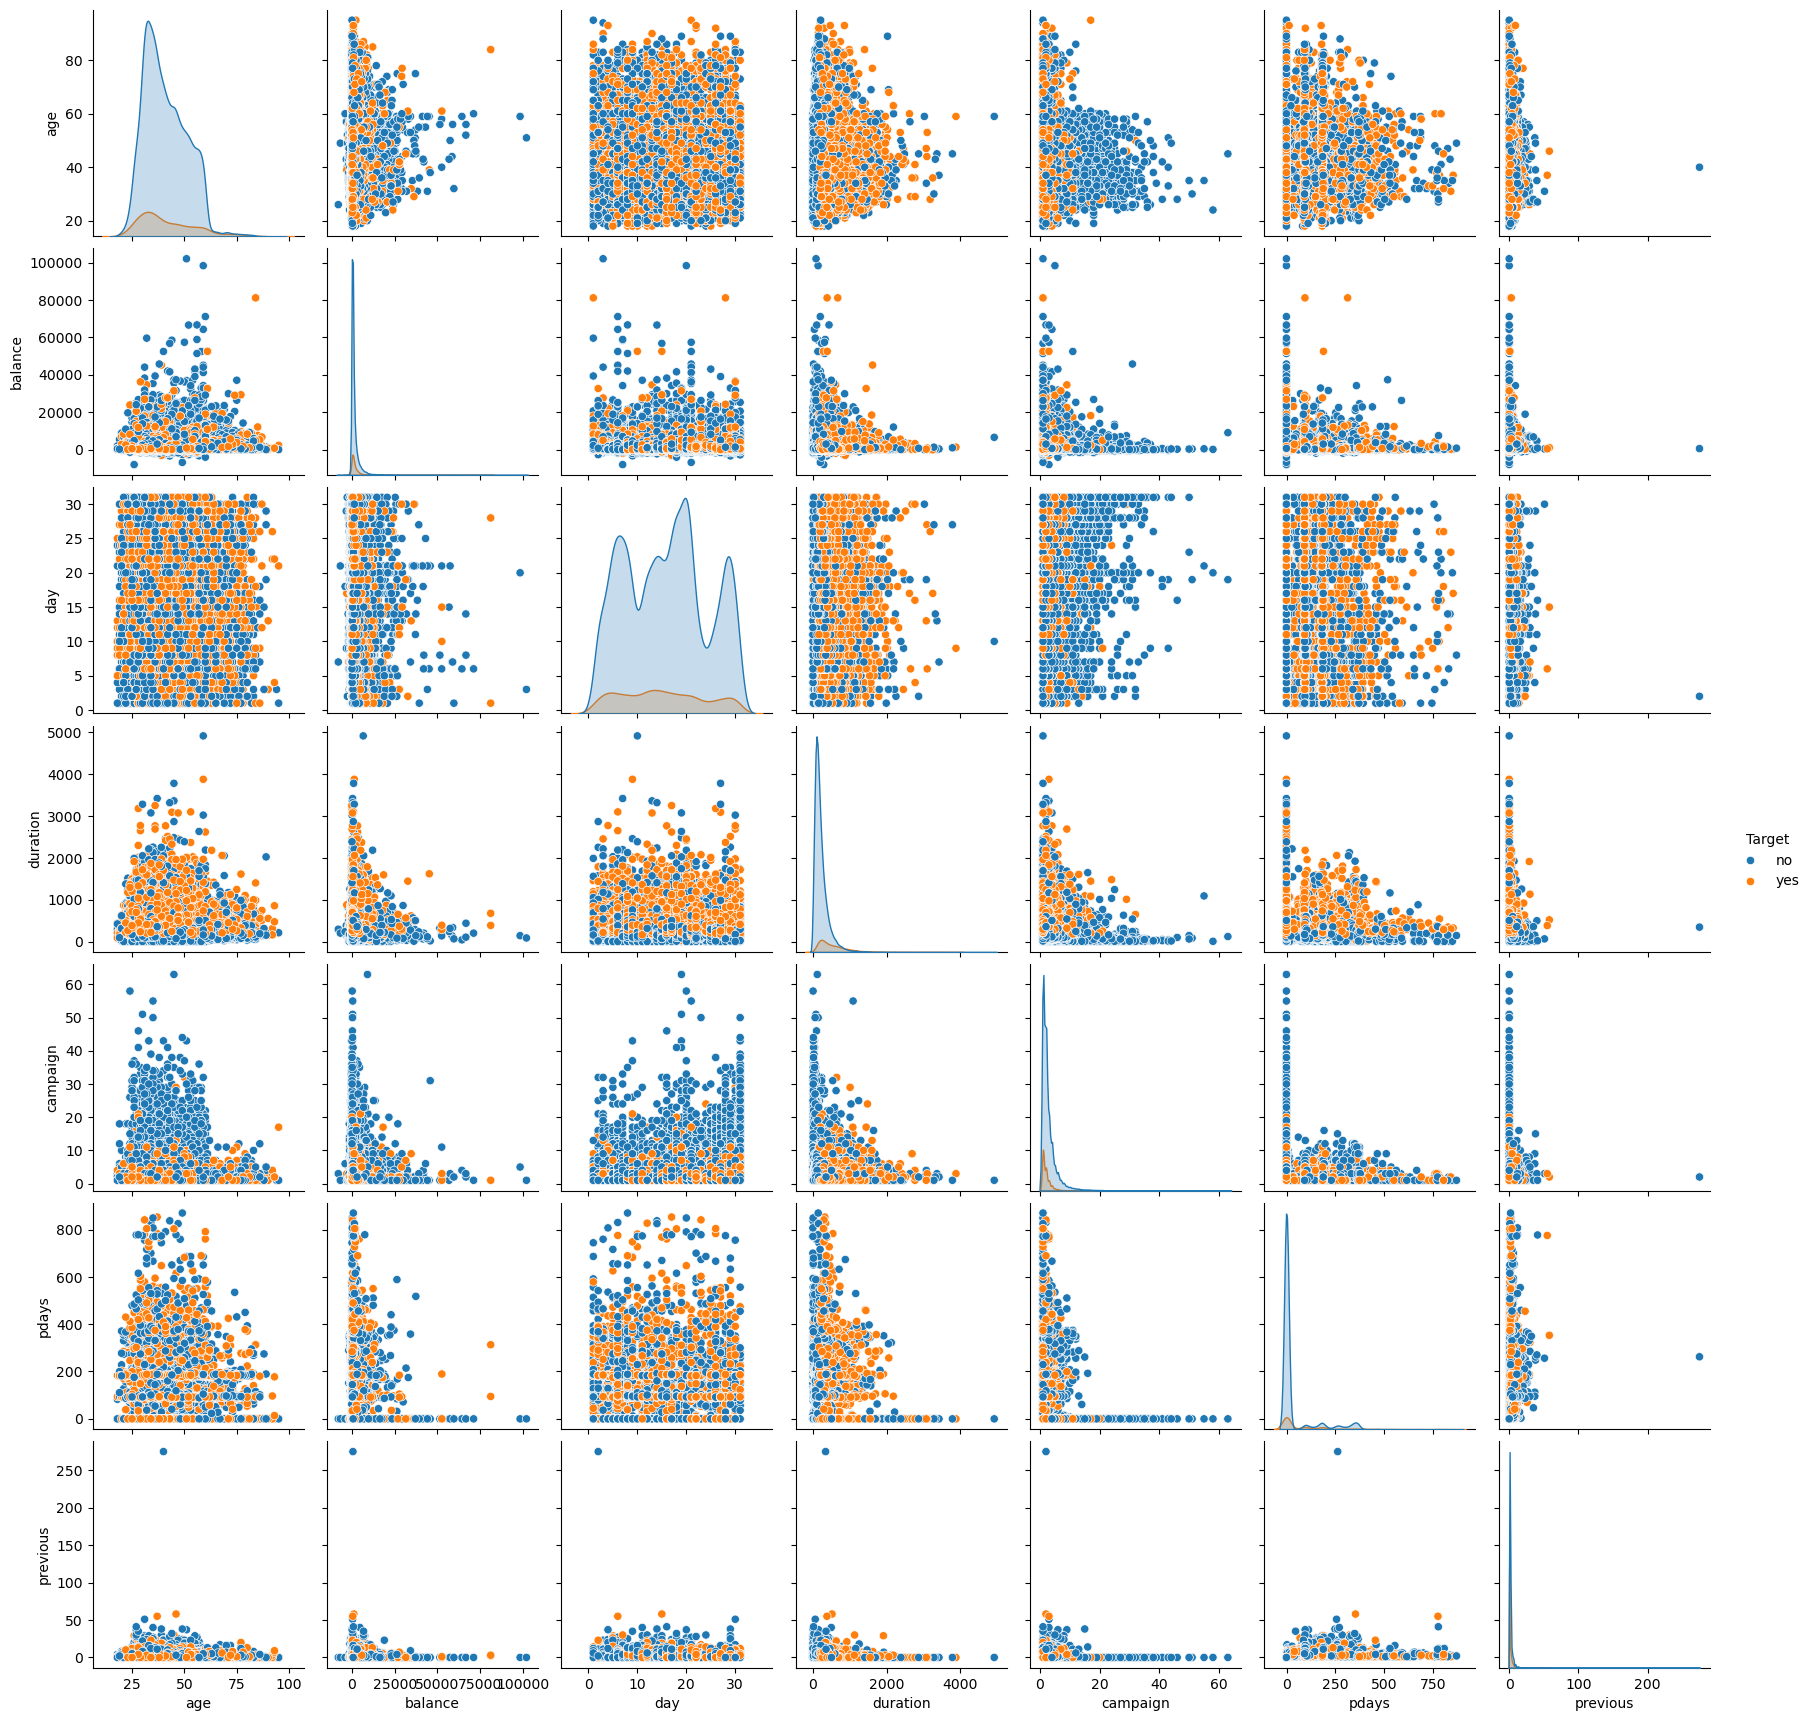

In [19]:
sns.pairplot(df, hue='Target')

In [23]:
num_df = df.select_dtypes(include='number')
num_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [25]:
corr = num_df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

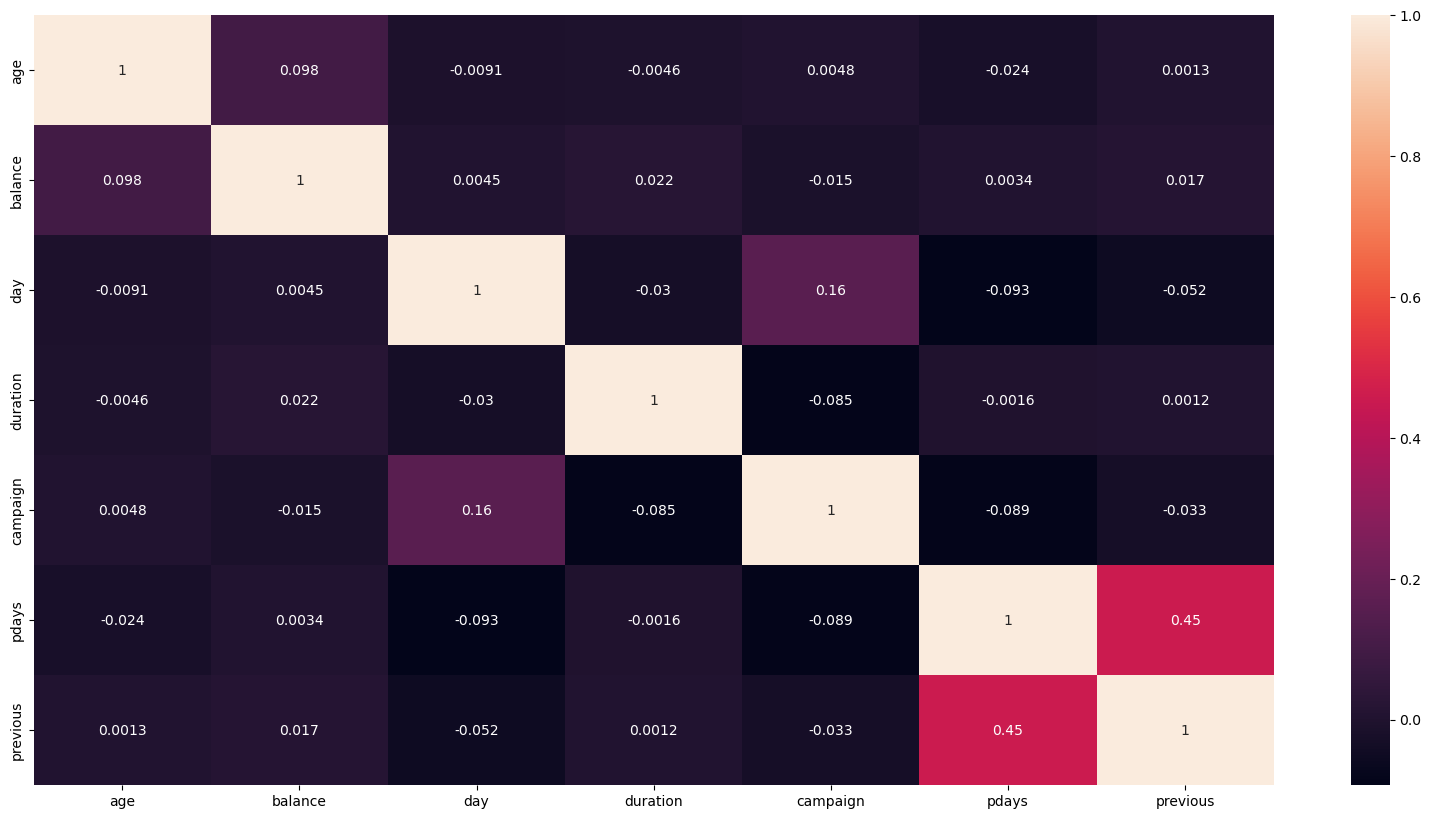

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [29]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
df.drop(['contact','day','month'],axis=1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,unknown,no


In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes # 0 1 2 3

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int8 
 13  Target     45211 non-null  int8 
dtypes: int64(6), int8(8)
memory usage: 2.4 MB


In [37]:
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,3,0,2143,1,0,261,1,-1,0,3,0
1,44,10,2,2,0,29,1,0,151,1,-1,0,3,0
2,33,2,1,2,0,2,1,1,76,1,-1,0,3,0
3,47,1,1,0,0,1506,1,0,92,1,-1,0,3,0
4,33,5,2,0,0,1,0,0,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,3,0,825,0,0,977,3,-1,0,3,1
45207,71,6,0,1,0,1729,0,0,456,2,-1,0,3,1
45208,72,6,1,2,0,5715,0,0,1127,5,184,3,2,1
45209,57,1,1,2,0,668,0,0,508,4,-1,0,3,0


In [11]:
X = df.drop('Target',axis=1)
y = df['Target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## RandomForestClassifier
A Random Forest Classifier is a popular and powerful ensemble learning method in machine learning, particularly for classification tasks. It is an extension of the bagging (Bootstrap Aggregating) ensemble technique and is built upon the foundation of decision trees. Random Forests are known for their robustness and ability to handle a wide range of data types and complexities.

Here's how a Random Forest Classifier works:

1. **Ensemble of Decision Trees**: A Random Forest consists of a collection of decision trees. Each decision tree is trained on a different bootstrap sample of the training data. Bootstrap sampling involves randomly selecting data points from the training dataset with replacement, which creates diverse subsets of data for training each tree.

2. **Random Feature Selection**: In addition to using different subsets of the data, Random Forests also employ a technique called "random feature selection" or "feature bagging." For each decision tree, a random subset of features (input variables) is considered when making splits at each node of the tree. This introduces further diversity among the trees.

3. **Voting for Classification**: When making predictions in a Random Forest Classifier, each tree in the ensemble produces a class prediction. In classification tasks, the final prediction is determined by a majority vote among the individual trees. The class that receives the most votes is considered the ensemble's prediction.

4. **Proximity and Probabilities**: Random Forests can also provide information about the proximity of data points to one another and class probabilities. Proximity measures how often two data points fall in the same terminal node of a tree, which can be useful for clustering or outlier detection. Class probabilities are obtained by averaging the predicted probabilities from all trees.

Key advantages of Random Forests:

- **High Accuracy**: Random Forests are known for their high accuracy, as they leverage the collective knowledge of multiple decision trees.

- **Robust to Overfitting**: The ensemble nature of Random Forests and the use of random feature selection reduce overfitting, making them suitable for a wide range of datasets.

- **Variable Importance**: Random Forests can estimate the importance of each feature in the classification task, which is useful for feature selection.

- **Handling of Missing Data**: Random Forests can effectively handle datasets with missing values.

- **Robust to Outliers**: Random Forests are less sensitive to outliers in the data due to the averaging effect of the ensemble.

Random Forests are widely used in various fields and are considered a go-to method for many classification tasks. They are implemented in popular machine learning libraries like scikit-learn in Python, making them accessible and easy to use.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12647
           1       0.35      0.61      0.45       917

    accuracy                           0.90     13564
   macro avg       0.66      0.76      0.69     13564
weighted avg       0.93      0.90      0.91     13564



<Axes: xlabel='Target', ylabel='count'>

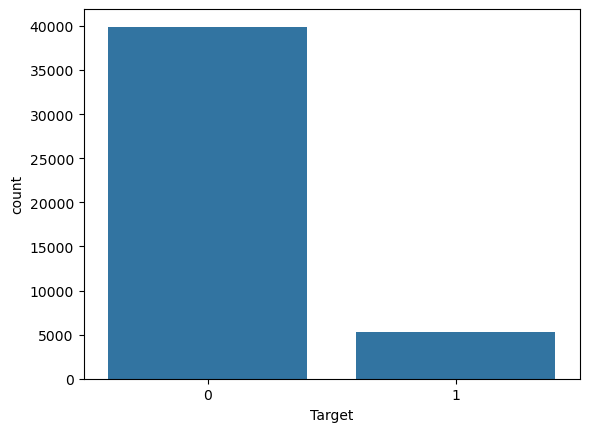

In [23]:
sns.countplot(x = df['Target'])

<Axes: >

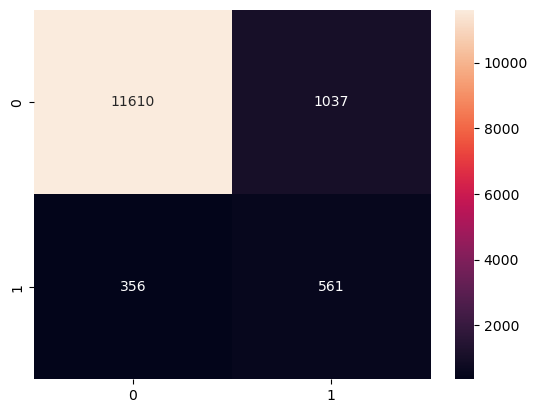

In [25]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')

## UnderSampling and OverSampling

In [ ]:
# pip install imblearn --upgrade --quiet

In [27]:
# UnderSampling : It will reduce the number of rows for higher class
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler(random_state=42)
X_resample, y_resample = us.fit_resample(X,y)

In [29]:
print(sum(y == 1))
print(sum(y == 0))

5289
39922


In [31]:
print(sum(y_resample == 1))
print(sum(y_resample == 0))

5289
5289


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,test_size=0.3,random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [37]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1618
           1       0.79      0.79      0.79      1556

    accuracy                           0.79      3174
   macro avg       0.79      0.79      0.79      3174
weighted avg       0.79      0.79      0.79      3174



In [41]:
X.values

array([[ 58,   4,   1, ...,  -1,   0,   3],
       [ 44,  10,   2, ...,  -1,   0,   3],
       [ 33,   2,   1, ...,  -1,   0,   3],
       ...,
       [ 72,   6,   1, ..., 184,   3,   2],
       [ 57,   1,   1, ...,  -1,   0,   3],
       [ 37,   2,   1, ..., 188,  11,   1]], dtype=int64)

In [43]:
y.ravel()

C:\Users\piyus\AppData\Local\Temp\ipykernel_23652\1610652532.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y.ravel()


array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [45]:
# OverSampling : It will increase the number of rows for lower class
# Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X.values,y.ravel())

C:\Users\piyus\AppData\Local\Temp\ipykernel_23652\811750995.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_sm, y_sm = sm.fit_resample(X.values,y.ravel())


In [47]:
print(sum(y == 1))
print(sum(y == 0))

5289
39922


In [49]:
print(sum(y_sm == 1))
print(sum(y_sm == 0))

39922
39922


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.3,random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [55]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     11973
           1       0.89      0.92      0.90     11981

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954



<Axes: >

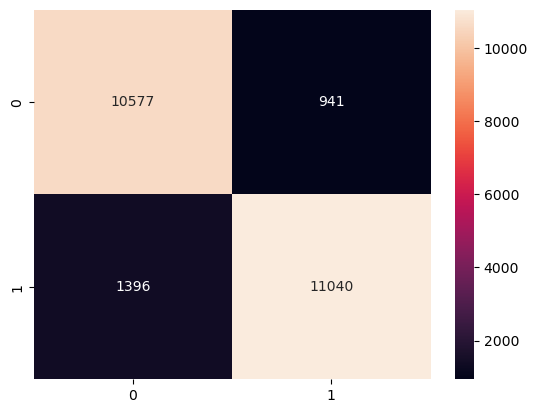

In [59]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')

## BaggingClassifier

The BaggingClassifier is an ensemble machine learning technique that is designed to improve the accuracy and robustness of a base classifier. It belongs to a family of methods known as bagging, which stands for Bootstrap Aggregating. Bagging combines multiple base models to create a more powerful ensemble model. The BaggingClassifier, specifically, is used for classification tasks.

Here's how the BaggingClassifier works:

1. **Bootstrap Sampling**: The BaggingClassifier starts by creating multiple subsets (samples) of the original training data through a process called bootstrap sampling. Each subset is generated by randomly selecting data points from the training dataset with replacement. As a result, some data points may appear more than once in a subset, while others may be omitted.

2. **Base Model Training**: A base classifier, such as a decision tree or any other classifier of your choice, is trained independently on each of these bootstrap samples. The purpose of this step is to create a diverse set of base models. Each model sees a slightly different subset of the data.

3. **Voting (for Classification)**: When making predictions, the BaggingClassifier aggregates the predictions from all the base models. In classification tasks, the most common aggregation technique is a majority vote. Each base model "votes" for the class it predicts, and the class with the most votes is considered the ensemble's final prediction.

4. **Voting (for Regression)**: If you're using the BaggingRegressor instead (for regression tasks), the predictions are aggregated differently. In this case, the ensemble model typically calculates the average or the median of the base models' predictions.

The BaggingClassifier offers several advantages:

- **Reduces Variance**: By combining multiple models, Bagging can reduce the variance of the final model, making it more robust and less prone to overfitting. Each base model sees a slightly different dataset, which helps improve generalization.

- **Improves Accuracy**: Bagging often leads to improved accuracy because it leverages the wisdom of multiple models. Even if some base models make errors, the ensemble can make a correct prediction by aggregating the votes.

- **Works Well with Weak Learners**: Bagging works particularly well when the base classifiers are "weak learners," meaning they have limited predictive power. It can significantly enhance their performance.

- **Easy to Parallelize**: Since the base models are trained independently, Bagging is easy to parallelize, making it suitable for distributed computing and speeding up training.

Common base models for BaggingClassifier include decision trees, which are often used because they're prone to high variance, making them a good candidate for the variance reduction that bagging provides. However, you can use various other classifiers as base models.

The BaggingClassifier is just one of many ensemble methods available in machine learning. It's a popular choice for improving model performance and is implemented in libraries like scikit-learn in Python.

In [61]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(n_estimators=10)
bg.fit(X_train,y_train)

BaggingClassifier()

In [62]:
y_pred = bg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11973
           1       0.89      0.91      0.90     11981

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954



In [71]:
bg1 = BaggingClassifier(estimator = model,n_estimators=10)  # model: RandomForestClassifier()
bg1.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(n_estimators=20))

In [73]:
y_pred = bg1.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     11973
           1       0.88      0.93      0.90     11981

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954



In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
rf =  RandomForestClassifier()
dt =  DecisionTreeClassifier()
lr = LogisticRegression()

In [81]:
bglr =  BaggingClassifier(estimator= lr,
                        n_estimators=10,
                       random_state=42)
bglr.fit(X_train,y_train)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BaggingClassifier(estimator=LogisticRegression(), random_state=42)

In [82]:
y_pred = bglr.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int8)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81     11973
           1       0.82      0.77      0.80     11981

    accuracy                           0.80     23954
   macro avg       0.80      0.80      0.80     23954
weighted avg       0.80      0.80      0.80     23954



In [89]:
bgdt = BaggingClassifier(estimator= dt,
                        n_estimators=10,
                       random_state=42)
bgdt.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [91]:
y_pred = bgdt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     11973
           1       0.90      0.90      0.90     11981

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954



In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [97]:
bgknn = BaggingClassifier(estimator = knn,
                        n_estimators=10,
                       random_state=42)
bgknn.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42)

In [99]:
y_pred = bgknn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     11973
           1       0.81      0.94      0.87     11981

    accuracy                           0.86     23954
   macro avg       0.87      0.86      0.86     23954
weighted avg       0.87      0.86      0.86     23954



# Boosting

## 1. AdaBoost
`AdaBoostClassifier` is an implementation of the AdaBoost (Adaptive Boosting) ensemble method in scikit-learn, a popular machine learning library in Python. AdaBoost is a boosting algorithm that combines multiple weak learners (typically decision trees with limited depth) to create a strong, highly accurate predictive model. Here's an explanation of `AdaBoostClassifier` and how it works:

1. **Ensemble Learning**:
   - AdaBoost is an ensemble learning technique, which means it combines the predictions of multiple weak learners to improve the overall predictive performance.

2. **Sequential Training**:
   - `AdaBoostClassifier` trains a series of weak classifiers sequentially, with each new classifier focusing on the instances that the previous classifiers got wrong.
   - After each iteration, the algorithm assigns higher weights to the misclassified instances, making them more important for the next classifier to get right.

3. **Weighted Voting**:
   - During the final prediction, AdaBoost combines the predictions of all the weak learners, giving each learner a weight based on its accuracy. More accurate learners have a higher weight in the final prediction.

4. **Adjustable Number of Estimators**:
   - You can specify the number of estimators (weak classifiers) to use in the ensemble through the `n_estimators` parameter. A larger number of estimators can lead to better performance, but it may also increase the risk of overfitting.

5. **Adaptive Learning Rate**:
   - AdaBoost uses an adaptive learning rate to determine the contribution of each weak learner. It assigns higher learning rates to more accurate models, making them more influential in the ensemble.

6. **Support for Different Base Classifiers**:
   - While decision trees are commonly used as base classifiers in AdaBoost, you can also specify other weak learners by providing a custom base estimator through the `base_estimator` parameter.

7. **Robustness to Noisy Data**:
   - AdaBoost can handle noisy data to some extent because it focuses on the most challenging instances in the training set, trying to correct their classification errors.

Here's an example of how to use `AdaBoostClassifier` in scikit-learn:

```python
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)
```

In this code, we use `AdaBoostClassifier` to train an AdaBoost ensemble on the Iris dataset and evaluate its accuracy on a test set. This classifier can be used for both binary and multiclass classification problems and is known for its ability to improve model performance by focusing on the difficult-to-classify instances.

In [104]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=20)
abc.fit(X_train,y_train)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=20)

In [106]:
y_pred = abc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     11973
           1       0.84      0.87      0.85     11981

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954



## 2. GradientBoosting
The `GradientBoostingClassifier` is a machine learning model in scikit-learn that belongs to the family of ensemble methods, specifically, the Gradient Boosting ensemble. Gradient Boosting is a powerful and flexible technique for building predictive models, and the `GradientBoostingClassifier` is typically used for classification tasks. Here's an explanation of the `GradientBoostingClassifier` and how it works:

1. **Ensemble Learning**:
   - Gradient Boosting is an ensemble learning technique that combines the predictions of multiple weak learners to create a strong and accurate predictive model.

2. **Sequential Training**:
   - The `GradientBoostingClassifier` trains a series of decision trees sequentially. Each tree tries to correct the errors made by the previous trees.
   - It assigns higher weights to the instances that were misclassified by the previous trees, making them more important for the subsequent trees.

3. **Gradient Descent Optimization**:
   - Gradient Boosting optimizes a loss function (e.g., mean squared error for regression or log loss for classification) using gradient descent.
   - It minimizes the loss by updating the model's predictions in a direction that reduces the loss.

4. **Regression and Classification**:
   - While `GradientBoostingClassifier` is designed for classification tasks, there's also `GradientBoostingRegressor` for regression tasks. The core concept is the same, but the loss functions and the nature of the target variable differ.

5. **Trees as Weak Learners**:
   - Decision trees are commonly used as weak learners (base estimators) in Gradient Boosting. These trees are usually shallow to prevent overfitting.
   - The depth of the trees and other hyperparameters can be tuned to control the model's complexity and performance.

6. **Regularization**:
   - Gradient Boosting models include techniques for preventing overfitting, such as subsampling (stochastic gradient boosting) and regularization through parameters like `max_depth` and `min_samples_split`.

7. **Hyperparameter Tuning**:
   - You can adjust hyperparameters like the number of trees (`n_estimators`), learning rate (`learning_rate`), and maximum depth of trees (`max_depth`) to control the model's behavior.

8. **Robustness**:
   - Gradient Boosting is generally robust to outliers and can handle complex relationships in the data.

Here's an example of how to use `GradientBoostingClassifier` in scikit-learn:

```python
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("GradientBoostingClassifier Accuracy:", accuracy)
```

In this code, we use `GradientBoostingClassifier` to train a Gradient Boosting ensemble on the Iris dataset and evaluate its accuracy on a test set. This classifier is known for its strong predictive power and ability to handle a wide range of classification tasks.

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7)

In [149]:
y_pred = gbc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11973
           1       0.87      0.89      0.88     11981

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.88     23954
weighted avg       0.88      0.88      0.88     23954



# 3. XGBoost
The `XGBClassifier` is part of the XGBoost (Extreme Gradient Boosting) library, which is a popular machine learning library used for both classification and regression tasks. XGBoost is known for its efficiency and high predictive performance. The `XGBClassifier` is specifically designed for classification tasks. Here's an explanation of the `XGBClassifier` and how it works:

1. **Ensemble Learning**:
   - XGBoost is an ensemble learning technique, which means it combines the predictions of multiple weak learners to create a strong and highly accurate predictive model.

2. **Gradient Boosting**:
   - XGBoost is an implementation of the gradient boosting algorithm, which trains decision trees sequentially. Each tree corrects the errors of the previous trees.
   - The optimization process involves minimizing a loss function (e.g., log loss for classification) by using gradient descent.

3. **Regularization**:
   - XGBoost provides several techniques for preventing overfitting, including L1 and L2 regularization (controlled by the `alpha` and `lambda` parameters), which can help make the model more robust.

4. **Customizable Parameters**:
   - You can control the behavior of the XGBoost model by adjusting various hyperparameters, such as the number of trees (`n_estimators`), the learning rate (`learning_rate`), maximum tree depth (`max_depth`), and subsampling of data for each tree (`subsample`).

5. **Handling Missing Values**:
   - XGBoost can automatically handle missing values in the dataset, which is a convenient feature when dealing with real-world data.

6. **Parallel and Distributed Computing**:
   - XGBoost supports parallel and distributed computing, making it efficient for large datasets and multicore processors.

7. **Tree Pruning**:
   - XGBoost employs a technique called tree pruning to remove nodes that contribute little to the model's predictive power, reducing the complexity of individual trees and mitigating overfitting.

8. **Highly Efficient**:
   - XGBoost is highly optimized for speed and memory efficiency. It is often a top choice for machine learning competitions and real-world applications.

Here's an example of how to use the `XGBClassifier`:

```python
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBClassifier Accuracy:", accuracy)
```

In this code, we use the `XGBClassifier` to train an XGBoost ensemble on the Iris dataset and evaluate its accuracy on a test set. XGBoost is known for its high predictive power and efficiency, making it a popular choice for various machine learning tasks.

In [156]:
pip install xgboost --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [158]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [160]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     11973
           1       0.88      0.91      0.89     11981

    accuracy                           0.89     23954
   macro avg       0.89      0.89      0.89     23954
weighted avg       0.89      0.89      0.89     23954



## 4. LightGBM (Light Gradient Boosting Machine)
LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework developed by Microsoft that is designed for efficiency and high performance. The LightGBM library includes classifiers for both classification and regressions tasks. The `LGBMClassifier` is specifically used for classification problems. Here's an explanation of the `LGBMClassifier` and how it works:

1. **Gradient Boosting**:
   - LightGBM is an implementation of the gradient boosting algorithm, similar to XGBoost and scikit-learn's `GradientBoostingClassifier`. It builds an ensemble of decision trees sequentially, with each tree correcting the errors of the previous ones.

2. **Lightweight and Efficient**:
   - LightGBM is designed for speed and memory efficiency. It is known for its faster training times compared to other gradient boosting libraries, making it suitable for large datasets.

3. **Histogram-Based Splitting**:
   - LightGBM uses a histogram-based approach to find the best split points during the tree-building process. This can significantly reduce the computational cost of finding optimal splits for categorical features.

4. **Leaf-Wise Tree Growth**:
   - Unlike traditional depth-first tree construction, LightGBM uses a leaf-wise tree growth strategy. This approach can lead to faster training times, but it may also be more prone to overfitting with small datasets.

5. **Handling Categorical Features**:
   - LightGBM provides native support for handling categorical features, making it easier to work with datasets that include both numerical and categorical data.

6. **Regularization**:
   - You can apply L1 (Lasso) and L2 (Ridge) regularization to the model using the `alpha` and `lambda` hyperparameters to prevent overfitting.

7. **Customizable Parameters**:
   - LightGBM offers a wide range of hyperparameters that allow you to fine-tune the model's behavior, including the number of boosting rounds (`num_iterations`), learning rate (`learning_rate`), maximum tree depth (`max_depth`), and more.

8. **Parallel and Distributed Computing**:
   - LightGBM supports parallel and distributed computing, which is beneficial for multicore processors and distributed computing environments.

Here's an example of how to use the `LGBMClassifier`:

```python
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define parameters
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, 100)

# Make predictions on the test set
y_pred = np.argmax(lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration), axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("LGBMClassifier Accuracy:", accuracy)
```

In this code, we use the `LGBMClassifier` to train a LightGBM model on the Iris dataset and evaluate its accuracy on a test set. LightGBM is an efficient and powerful library for various machine learning tasks, especially when dealing with large datasets and categorical features.

In [166]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [168]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define parameters
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, 100)

# Make predictions on the test set
y_pred = np.argmax(lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration), axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("LGBMClassifier Accuracy:", accuracy)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

## 5. CatBoost
The `CatBoostClassifier` is a machine learning model implemented in the CatBoost library, which stands for "Categorical Boosting." CatBoost is a powerful and efficient gradient boosting library designed to handle categorical features effectively. The `CatBoostClassifier` is specifically used for classification tasks. Here's an explanation of the `CatBoostClassifier` and how it works:

1. **Gradient Boosting**:
   - Like XGBoost and LightGBM, CatBoost is an implementation of the gradient boosting algorithm. It builds an ensemble of decision trees sequentially, with each tree correcting the errors made by the previous ones.

2. **Categorical Feature Handling**:
   - CatBoost is designed to work well with datasets that contain categorical features. It can handle them without the need for one-hot encoding or extensive preprocessing.
   - It uses an efficient technique called "ordered boosting" to process categorical features during tree construction.

3. **Efficiency and Speed**:
   - CatBoost is optimized for speed and memory efficiency. It is known for its fast training times, making it suitable for large datasets.

4. **Built-In Regularization**:
   - CatBoost includes built-in regularization techniques, such as L1 (Lasso) and L2 (Ridge) regularization, which help prevent overfitting.

5. **Customizable Parameters**:
   - CatBoost provides a wide range of hyperparameters that allow you to fine-tune the model's behavior, including the number of boosting iterations (`iterations`), learning rate (`learning_rate`), maximum tree depth (`depth`), and more.

6. **Handling Missing Values**:
   - CatBoost can handle missing values, allowing you to work with datasets that may contain missing information.

7. **Native GPU Support**:
   - CatBoost has native support for GPU acceleration, which can significantly speed up the training process on compatible hardware.

8. **Robust to Noisy Data**:
   - CatBoost is robust to noisy data and can handle datasets with varying degrees of noise.

9. **Model Interpretability**:
   - CatBoost provides tools for interpreting the model's predictions, allowing you to gain insights into feature importance and the decision-making process of the model.

Here's an example of how to use the `CatBoostClassifier`:

```python
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_seed=42)

# Train the classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoostClassifier Accuracy:", accuracy)
```

In this code, we use the `CatBoostClassifier` to train a CatBoost model on the Iris dataset and evaluate its accuracy on a test set. CatBoost is a powerful library that excels in handling categorical features and can be used for a wide range of classification tasks.

In [172]:
pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 1.0/101.7 MB 2.3 MB/s eta 0:00:45
    --------------------------------------- 1.8/101.7 MB 2.5 MB/s eta 0:00:41
    --------------------------------------- 2.1/101.7 MB 2.4 MB/s eta 0:00:41
   - -------------------------------------- 2.6/101.7 MB 2.4 MB/s eta 0:00:42
   - -------------------------------------- 3.1/101.7 MB 2.4 MB/s eta 0:00:41
   - -------------------------------------- 3.7/101.7 MB 2.4 MB/s eta 0:00:41
   - -------------------------------------- 4.2/101.7 MB 2.4 MB/s eta 0:00:42
   - -------------------------------------- 4.5/101.7 MB 2.4 MB/s eta 0:00:42
   - -------------------------------------- 5.0/101.7 MB 2.3 MB/s eta 0:00:42
   -- ------------------------------------- 5.2/101.7 MB 2.3 MB/s eta 0:00:43


In [174]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_seed=42)

# Train the classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoostClassifier Accuracy:", accuracy)

CatBoostClassifier Accuracy: 1.0
